## HW6_zz1598
# Assignment 1 
## Building Energy

In [57]:
from __future__ import print_function, division
import urllib
import codecs
from zipfile import ZipFile
import geopandas as gp
import pandas as pd
import os
import json
import seaborn
from pandas.tools.plotting import scatter_matrix
import pylab as pl
%pylab inline

#import sklearn
import statsmodels.formula.api as smf
import statsmodels.api as sm
#import scipy

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")



Populating the interactive namespace from numpy and matplotlib


geopandas works with geospacial data: the shape files that we get from pluto for example.

PLEASE REMEMBER: seed your random functions if you need to use any, label your axes clearly, comment your code, use PEP8!


### An interesting urban question is "can we measure and predict energy use based on observables that are easier to be acquired". For example the urban observatory at CUSP can monitor lights: they are a realtively easy observable. All you need is a camera, and a pipeline to process your data. But how does the light coming from a window relate to the total energy consumption? We generally postulate that light is a proxy for occupancy, and that occupancy is a good predictor of energy consumption.
### So let's test if the last link holds. If we have data on the energy consumed by a __building__ how well does that relate to the number of units in the building?

### Data on energy consumption can be found here for the city of NY https://data.cityofnewyork.us/Environment/Energy-and-Water-Data-Disclosure-for-Local-Law-84-/rgfe-8y2z  

### Either obtain the data through the API or download the csv file, and move it to $PUIDATA

### However this datasets does not have the number of units. We can find that in the Pluto dataset.

### Reading in the Pluto data for manhattan, which will give me the number of units ber building   Manhattan/MNMapPLUTO.shp

In [5]:
# get building engery data and move to PUIDATA directory
def get_energy_data(filename, link):
    print("Try achieving...", filename)

    #check if it is in the folder already
    if not os.path.isfile(os.getenv('PUIDATA') + "/" + filename):
                       
        #if not exists, then download the csv file from website
        os.system('curl -O ' + link) # (save in current directory) 
        os.system('mv ' + 'rows.csv?accessType=DOWNLOAD ' + filename )
        os.system('mv ' + filename +' '+ os.getenv('PUIDATA')) # Move the file into PUIDATA directory
        print ('download successfully')
    print("file in place, please continue")

In [6]:
#get building units data from Pluto Dataset
def get_bsize_data(filename, link):
    print("Try rechieving shape file ", filename)

    #check if it is in the folder already
    if not os.path.isdir(os.getenv('PUIDATA') + "/" + filename + '_unzipped'):
        if not os.path.isfile(os.getenv('PUIDATA') + '/' + filename + '.zip'):   #add .zip
                       
            #if neither shape file nor zip file exists, then download the zipped shp file from 
            os.system('curl -O ' + link) # download to the current directory)
            print('download successfully, now unzipping...')
            
        # Move the zip file into PUIDATA directory
        zipfile = filename + '.zip'
        os.system('mv ' + zipfile + ' ' + os.getenv('PUIDATA'))     

        # get the path of the zipfile
        zipfile_path = os.getenv('PUIDATA') + '/' + zipfile

        # unzip file method 1:
        to_unzip = ZipFile(zipfile_path, 'r')
        unzipped_file_path = os.getenv('PUIDATA') + '/' + filename + '_unzipped'
        to_unzip.extractall(unzipped_file_path)
        to_unzip.close()
        
        # unzip file method 2:
        #unzip the file, and move from current dir to PUIDATA
        #os.system('unzip ' + os.getenv('PUIDATA') + '/' + zipfile + ' -d ' + 'os.getenv('PUIDATA') + '/' + filename)
                
        print ('unzip successfully')
    print ("file in place, you can continue") 

#http://blog.yhat.com/posts/interactive-geospatial-analysis.html   to unzip and get the shape file

In [7]:
#if we need to get a specific shape file from the unzipped file directory
#for file in os.listdir(unzipped_file_path):
#        if file == "MNMapPLUTO.shp":
#            #print ('ready to move')
#            #os.system(unzipped_file_path)
#            os.system('mv ' + unzipped_file_path + '/' + file + ' ' + os.getenv('PUIDATA'))  

In [8]:
#url_nrg = 'https://data.cityofnewyork.us/resource/m46j-75iy.json
url_nrg = 'https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv?accessType=DOWNLOAD&bom=true'
#url_nrg = 'https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv?accessType=DOWNLOAD'
filename_nrg = 'building_energy.csv'

url_building_size = 'http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mappluto_16v1.zip'
filename = 'mappluto_16v1' #no suffix for conveinience (upzip process)
#filename_bsize = 'MNMapPLUTO.shp'  

In [9]:
get_energy_data(filename_nrg, url_nrg)

Try achieving... building_energy.csv
file in place, please continue


In [10]:
get_bsize_data(filename, url_building_size)

Try rechieving shape file  mappluto_16v1
file in place, you can continue


In [11]:
df_nrg = pd.read_csv(os.getenv("PUIDATA") + "/" + filename_nrg)
df_nrg.head()

,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
0,12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
1,14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
2,12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
3,12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,...,No,None,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
4,15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,...,NaN,None,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


In [12]:
df_nrg.columns

Index([u'Record Number', u'NYC Borough, Block, and Lot (BBL)',
       u'Co-reported BBL Status', u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')

In [13]:
df_bsize = gp.read_file(os.getenv('PUIDATA') + '/' + 'mappluto_16v1_unzipped/Manhattan/MNMapPLUTO.shp')

df_bsize.head(4)

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.000000e+00,None,1592 2 AVENUE,C1-9/TA,None,2,468000.0,1435950.0,1.015450e+09,10885,...,0,1920,None,10028,C1-9,None,None,None,9a,"POLYGON ((997277.2344000041 221816.0936000049,..."
1,1.007230e+09,11/30/2006,263 9 AVENUE,C1-5/R8,None,2,539984.0,11879993.0,1.007238e+09,89203,...,0,1914,None,10001,R8,None,None,None,8d,"POLYGON ((984164.5626000017 211846.0703999996,..."
2,0.000000e+00,None,310 EAST 109 STREET,R7A,None,2,140102.0,343271.0,1.016800e+09,12000,...,0,1910,None,10029,R7A,None,None,None,6b,"POLYGON ((1000742.195800006 227910.6640000045,..."
3,0.000000e+00,None,720 PARK AVENUE,R10/PI/LH-1A,R8B,2,5040000.0,30591900.0,1.013850e+09,203490,...,2006,1928,None,10021,R10,R8B,None,None,8c,"POLYGON ((994007.6886000037 219880.428399995, ..."


In [14]:
df_bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [15]:
# make sure you clean up your data and throw away columns you do not need!
df2_nrg = df_nrg.loc[:,('NYC Borough, Block, and Lot (BBL)','Site EUI(kBtu/ft2)',\
                        'Reported Property Floor Area (Building(s)) (ft²)','DOF Number of Buildings')]
df2_nrg.dropna(how='any', inplace=True)
df2_nrg.head()

,"NYC Borough, Block, and Lot (BBL)",Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),DOF Number of Buildings
16,1.013110e+09,125.4,330000,1.0
45,4.002520e+09,46,390400,1.0
64,1.007660e+09,122.3,59468,1.0
65,1.008150e+09,117,364000,1.0
76,1.005050e+09,82.1,235370,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8f6e42d50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe8fd1e4150>]], dtype=object)

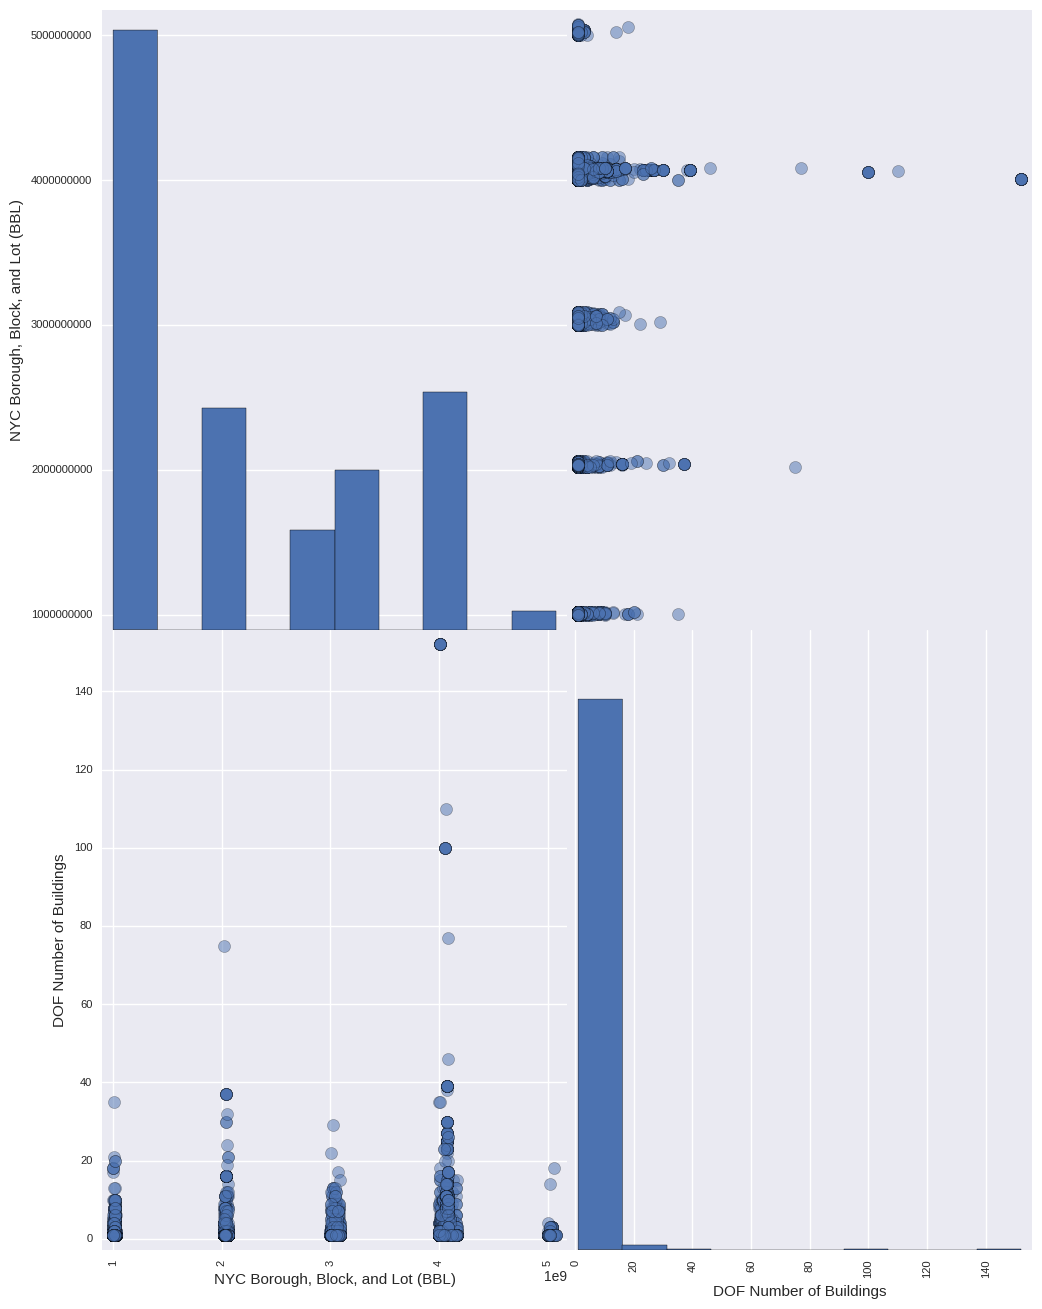

In [16]:
#try make a scatter plot of nrg. Few columns will plot
scatter_matrix(df2_nrg, s=300, figsize=(12, 16))

Figure 1: scatter matrix of all numerical values in the files.

### Get to know how the data looks like from the above scatter plot
This kind of plot shows correlations between variables, but it will also show me what can and cannot be plotted trivially in my dataset. Here only a few columns can be plotted: those that contain only numbers (and possibly NaN's), but most columns contain rows that cannot be converted to float (e.g. entries like 'See Primary BBL' in several rows for the energy dataframe 'Site EUI(kBtu/ft2) ' column) , so Pandas refuses to plot them, cause it does not know what to do with those entries. The columns I am interested in are in fact u'Site EUI(kBtu/ft2)' which is a measure of the energy consumed PER SQ FOOT by a building, and then the building area: for eg. u'Reported Property Floor Area (Building(s)) (ft²)'. Neither gets plotted: i need to remove all values that cannot conver to float in order to use the columns and convert them to float arrays and do math with them.

### Convert non-values to NAN
Below I created a function that returns True if what is passed as argument can be converted to a float, and False otherwise. I do it with the Try/Except structure. it is a very useful python functionality that you should look into.
This has to be done entry by entry: if you give it a series you get error "cannot convert the series to..."
However you can pass it a whole array by using it in conjunction with np.vectorize (look up the syntax!) which will implement a for loop for you under the hood to pass the series entry by entry to your function.

In [17]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False       


Now for every column I care about I can create an array, call it for eg. indx, of True and False (a Boolean array) that i can use as an index to pick entries that I want to use from my arrays of interest. 

I can replace the entries that failed to be converted to 'NaN'
(because my function return Trues when I can convert and False otherwise i actuallly want the complementary array: ~indx) 

In [18]:
# Columns interested:
#1. Site EUI(kBtu/ft2): a measure of the energy consumed PER SQ FOOT by a building, 
#2. Reported Property Floor Area (Building(s)) (ft²): the building's area

nrg_col_pick = ['Site EUI(kBtu/ft2)', 'Reported Property Floor Area (Building(s)) (ft²)']

for col in nrg_col_pick:
    index = (np.vectorize(canconvert)(df2_nrg[col]))
    print ('\n',col)
    print ('number of records ={}'.format(len(index)))
    print ('number of TRUE = {}'.format((index == True).sum()))
    print ('number of False = {}'.format((index == False).sum()))
    print ('number of non-value records coverted to NaN {}'.format((~index).sum()))
    df2_nrg[col][~index] = float('NaN')   
    print ((np.vectorize(canconvert)(df2_nrg[col])).astype(float).sum())
    
# The data type should become float64 now (can rerun the code to check if the number of False becomes 0)


 Site EUI(kBtu/ft2)
number of records =10786
number of TRUE = 10482
number of False = 304
number of non-value records coverted to NaN 304
10786.0

 Reported Property Floor Area (Building(s)) (ft²)
number of records =10786
number of TRUE = 10478
number of False = 308
number of non-value records coverted to NaN 308
10786.0


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# MERGE THE DATASET
TO DO IT WE NEED A COMMON COLUMN: the building id BBL However the name of this variable (column) in the Energy dataset is 'NYC Borough, Block, and Lot (BBL)'. create a column 'BBL' in the nrg dataset to pass it to the 'on' keyword argument of the merge pandas method: pd.merge(..... on=['BBL']) will use the common column 'BBL' to join the information from the 2 datasets for each BBL value (check out the complete syntax!)

In [19]:
df2_nrg.head(2)

,"NYC Borough, Block, and Lot (BBL)",Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),DOF Number of Buildings
16,1.013110e+09,125.4,330000,1.0
45,4.002520e+09,46,390400,1.0


In [20]:
# prepare your BBL columns
df2_nrg.rename(index=str, columns={'NYC Borough, Block, and Lot (BBL)':'BBL'}, inplace=True)
df2_nrg.columns

Index([u'BBL', u'Site EUI(kBtu/ft2)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Number of Buildings'],
      dtype='object')

In [21]:
df_bsize.head(2)

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.000000e+00,None,1592 2 AVENUE,C1-9/TA,None,2,468000.0,1435950.0,1.015450e+09,10885,...,0,1920,None,10028,C1-9,None,None,None,9a,"POLYGON ((997277.2344000041 221816.0936000049,..."
1,1.007230e+09,11/30/2006,263 9 AVENUE,C1-5/R8,None,2,539984.0,11879993.0,1.007238e+09,89203,...,0,1914,None,10001,R8,None,None,None,8d,"POLYGON ((984164.5626000017 211846.0703999996,..."


In [22]:
#df_bsize.columns

In [23]:
#merge
bblnrgdata = pd.merge(df2_nrg, df_bsize, how='inner', left_on='BBL', right_on='BBL')
bblnrgdata.head(2)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/indexes/base.py:2097: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target._values)
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/indexes/base.py:1237: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine


,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),DOF Number of Buildings,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,1.013110e+09,125.4,330000,1.0,0.0,None,950 3 AVENUE,C5-2,None,2,...,0,1977,Y,10022,C5-2,None,None,None,8c,"POLYGON ((993141.1744000018 216172.3948000073,..."
1,1.007660e+09,122.3,59468,1.0,0.0,None,230 WEST 17 STREET,C6-2A,None,2,...,1999,1912,None,10011,C6-2A,None,None,None,8d,"POLYGON ((984350.5375999957 209226.3930000067,..."


In [24]:
#view the columns
#bblnrgdata.columns

In [25]:
#drop some columns
bblnrgdata.drop([u'APPBBL',u'APPDate', u'Address', u'AllZoning1', u'AllZoning2',u'AreaSource', u'AssessLand',\
                u'BldgDepth',u'BldgFront','Block',u'BoroCode',u'Borough',u'BsmtCode', u'BuiltCode',u'BuiltFAR',\
                u'CB2010', u'CD',u'CT2010',u'ComArea',u'CommFAR',u'CondoNo',u'Council',u'EDesigNum',u'Easements',\
                u'ExemptLand',u'ExemptTot',u'Ext',u'FacilFAR',u'FactryArea',u'FireComp',u'GarageArea',u'HealthArea',\
                u'HistDist',u'IrrLotCode',u'LandUse',u'Landmark',u'Lot',u'LotArea',u'LotDepth',u'LotFront',u'LotType',\
                u'LtdHeight',u'Overlay1',u'Overlay2',u'OwnerName',u'OwnerType',u'PLUTOMapID',u'PolicePrct',u'ProxCode',\
                u'SPDist1',u'SPDist2',u'Sanborn',u'SanitBoro',u'SanitDist',u'SanitSub',u'SchoolDist',u'SplitZone',\
                u'ZoneDist1',u'ZoneDist2',u'ZoneDist3',u'ZoneDist4',u'ZoneMap'],axis=1, inplace=True)

In [26]:
bblnrgdata.columns

Index([                                             u'BBL',
                                     u'Site EUI(kBtu/ft2)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
                                u'DOF Number of Buildings',
                                              u'AssessTot',
                                               u'BldgArea',
                                              u'BldgClass',
                                             u'MAPPLUTO_F',
                                               u'NumBldgs',
                                              u'NumFloors',
                                             u'OfficeArea',
                                              u'OtherArea',
                                                u'ResArea',
                                               u'ResidFAR',
                                             u'RetailArea',
                                             u'SHAPE_Area',
                                        

In [27]:
# Now the scatter matrix plot should show more columns.
#scatter_matrix (bblnrgdata, s=30, figsize=(16, 16))

once you have the dataframe with all the info you want, you want to plot Energy vs Number of Units in the Building. Remember: **Energy TOTAL, not per sq ft...** Here you can choose what you think makes more sense for the number of units: all units, residential units... 

**Make a  scatter plot first of Energy vs Units. It will look really bad be cause all the datapoints are at very low Unit numbers while the Unit number range actually goes up to 8000. **


Make a second plot that zooms into the region where most points are by cutting your x and y axis plotted: e,g, use xlim=(1000,1e10), ylim=(1,1000), where the numbers to be plugged in depend on exactly what you chose to plot

I left my plots below as guidance. **Remember, each plot needs a descriptive caption, and axis labels**

In [28]:
# convert all to numerics
bblnrgdata[['Site EUI(kBtu/ft2)', 'Reported Property Floor Area (Building(s)) (ft²)']] = \
    bblnrgdata[['Site EUI(kBtu/ft2)', 'Reported Property Floor Area (Building(s)) (ft²)']].apply(pd.to_numeric)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/indexes/base.py:941: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return self._engine.is_unique
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/indexes/base.py:1945: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return self._engine.get_loc(key)


In [29]:
# Calculate total engery for all floors
bblnrgdata['total_energy'] = bblnrgdata['Site EUI(kBtu/ft2)'] * bblnrgdata['Reported Property \
Floor Area (Building(s)) (ft²)']
bblnrgdata.total_energy.head(5)

0    41382000.0
1     7272936.4
2    42588000.0
3    19323877.0
4     8923786.2
Name: total_energy, dtype: float64

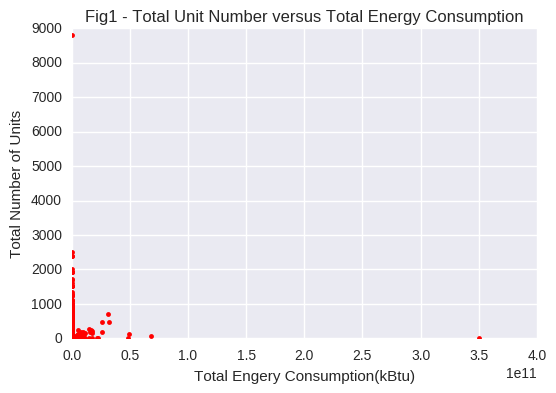

In [30]:
# Use attribute of All Units
# scatter plot for total energy 

pl.plot(bblnrgdata.total_energy, bblnrgdata.UnitsTotal, 'r.')
pl.title('Fig1 - Total Unit Number versus Total Energy Consumption')
pl.xlabel('Total Engery Consumption(kBtu)')
pl.ylabel('Total Number of Units')


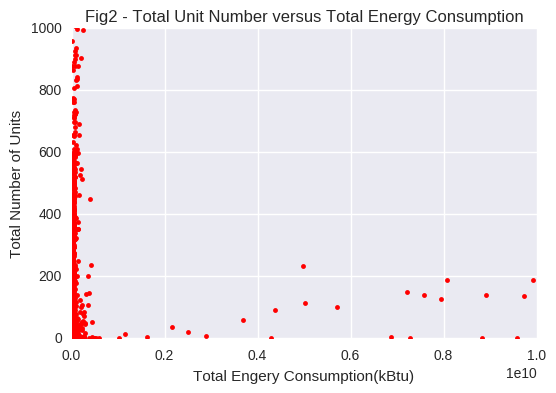

In [31]:
# zoomed in scatter plot
pl.plot(bblnrgdata.total_energy, bblnrgdata.UnitsTotal, 'r.')
pl.xlim(0,1e10)
pl.ylim(0,1e3)

pl.title('Fig2 - Total Unit Number versus Total Energy Consumption')
pl.xlabel('Total Engery Consumption(kBtu)')
pl.ylabel('Total Number of Units')

when the points in a plot all look scrunched against the axis 

**Try to make a log plot instead**. In pandas you enable that with the keyword 'loglog' : bblnrgdata.plot(..... loglog=True)

NOTICE THAT YOU WILL STILL HAVE TO CUT YOUR DATASET! in my data I had a lot of energy datapoints that were exactly 0. I removed these "outliers" which I think are truly outliers in the sense that they are misreported numbers. you can remove the data that have nrg==0 (or nrg < some sensible threshold choice) by indexing your array: something like bblnrgdata_cut = bblnrgdata[bblnrgdata.nrg>1000]

Also I removed the buildings with several thousand units. points like that at the edge of my range would have a lot of "LEVERAGE", however they are not suprious entries like the 0, which i believe are missing values, or perhaps abandoned lots. these are good datapoint that i need to throw away functionally for my analysis to work, but that should be stated clearly.



In [32]:
# Cut my dataframe to remove the ourliers
bblnrgdata_cut0 = bblnrgdata[bblnrgdata.total_energy>10000]
bblnrgdata_cut1 = bblnrgdata_cut0[(bblnrgdata_cut0.UnitsTotal>0)]
bblnrgdata_cut = bblnrgdata_cut1[bblnrgdata_cut1.UnitsTotal<1000]

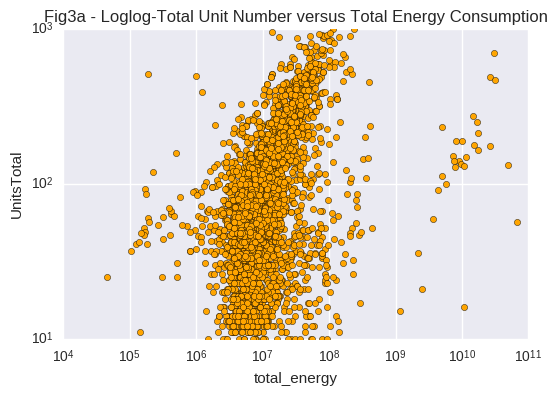

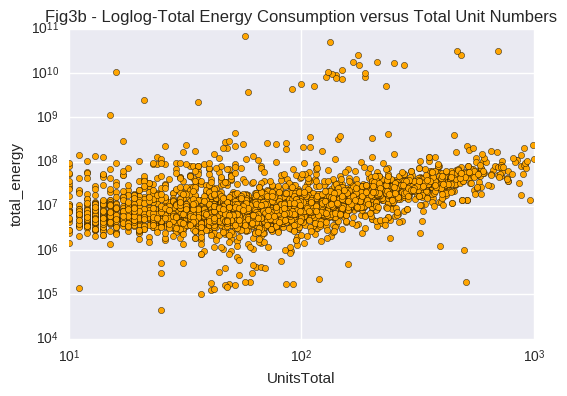

In [33]:
#log plot with zoommed the x and y view
bblnrgdata_cut.plot(x='total_energy', y='UnitsTotal', loglog=True, \
                   kind='scatter', color='orange',title='Fig3a - Loglog-Total Unit Number versus Total Energy Consumption',\
                   xlim=(1e4, 1e11), ylim=(1e1, 1e3))
                    
bblnrgdata_cut.plot(x ='UnitsTotal', y='total_energy', loglog=True, \
                   kind='scatter', color='orange', title='Fig3b - Loglog-Total Energy Consumption versus Total Unit Numbers',\
                   xlim=(1e1, 1e3), ylim=(1e4, 1e11))                    

Now fit a line through the data. you can use whatever you want to do it: statsmodels, scipy, any other package, or write your own minimization of the residuals

## BUT REMEMBER: we see hints of a linear relation in log space! so we want to fit a line to the log of our variables, not the variables themselves:
if you used statsmodels it would look something like this:


In [34]:
# Create Columns for log total_energy and log UnitsTotal
bblnrgdata_cut['log_total_energy']=np.log10(bblnrgdata_cut.total_energy)
bblnrgdata_cut['log_UnitsTotal']=np.log10(bblnrgdata_cut.UnitsTotal)
bblnrgdata_cut.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),DOF Number of Buildings,AssessTot,BldgArea,BldgClass,MAPPLUTO_F,NumBldgs,NumFloors,...,YCoord,YearAlter1,YearAlter2,YearBuilt,ZMCode,ZipCode,geometry,total_energy,log_total_energy,log_UnitsTotal
0,1.013110e+09,125.4,330000.0,1.0,56065500.0,313200,O4,0,1,32.0,...,216239,1989,0,1977,Y,10022,"POLYGON ((993141.1744000018 216172.3948000073,...",41382000.0,7.616811,1.748188
1,1.007660e+09,122.3,59468.0,1.0,6162300.0,53168,O3,0,1,8.0,...,209204,1987,1999,1912,None,10011,"POLYGON ((984350.5375999957 209226.3930000067,...",7272936.4,6.861710,0.903090
2,1.008150e+09,117.0,364000.0,1.0,36930600.0,364000,O4,0,1,22.0,...,213947,1972,0,1954,None,10018,"POLYGON ((988118.5699999928 213939.7745999992,...",42588000.0,7.629287,1.380211
3,1.005050e+09,82.1,235370.0,1.0,24756300.0,214110,O6,0,1,10.0,...,203783,2013,0,1926,None,10013,"POLYGON ((982849.6037999988 203886.2427999973,...",19323877.0,7.286094,1.380211
4,1.021420e+09,137.7,64806.0,1.0,2696400.0,64816,D7,0,1,6.0,...,246893,1988,0,1924,None,10032,"POLYGON ((1001098.760600001 246912.0266000032,...",8923786.2,6.950549,1.792392


In [35]:
# Further cut my dataframe to remove the ourliers
bblnrgdata_cut_lg = bblnrgdata_cut[bblnrgdata_cut.total_energy>1e4]
bblnrgdata_cut_lg = bblnrgdata_cut_lg[bblnrgdata_cut_lg.total_energy<1e11]

bblnrgdata_cut_lg = bblnrgdata_cut_lg[bblnrgdata_cut_lg.UnitsTotal>10]
bblnrgdata_cut_lg = bblnrgdata_cut_lg[bblnrgdata_cut_lg.UnitsTotal<1000]

## choose wisely which is your DEPENDENT and which is your INDEPENDENT variable. 
both for what you want to do logically (what changes as a functino of what) but also based on which variable has a 'sensible' distribution that allows you to fit a function to it: **you need your independent variable to span a large range, and to be spread somewhat evenly in the range, rather than just clustered in a spot** so in this case switching the independent and dependent variable may be a good idea.


1. **Fit a line** to Energy vs Units.
2. **Fit a line** to Units vs Energy.

3. **Evaluate which is better by calculating the chi square**. I provide a function for that or you can write your own. *Assume poisson statistics for the errors on the independent variable*. 
    The function is 
    
    chisq = $\sum_i \frac{(model(x_i) - data(x_i))^2 }{ error_i^2}$
    
    where the sum is over all datapoints, 
    
    for the i-th value with x value $x_i$ model is the predction of your fit for $x_i$, 
    
    $data(x_i)$ 
    is your observation, 
    
    and $error_i$ is $\sqrt{data(x_i)}$
    (but remember you worked in log space! What are the proper errors??)
    
4. **Fit a 2nd degree polynomial** to the Units vs Energy (with statsmodels.formulae.api.ols() for example passing the formula for a parabola, like we did in class. The formula for a 2nd deg polynomial is 
    $y = ax^2+bx+c$ .

5. **Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test**. The formula is:
    
    LR  =  -2 * (logLikelihood_Model1 - logLikelihood_Model2)
    
    where Model1 is the least complex (fewer parameters).
    
    Th logLikelihood can be extracted from the model summary when using statsmodels.
    
    Compare this LR statistics to a chi sq table (for example http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG) and say if *at alpha = 0.05* Model1 is preferible to Model2. The LR is chi^2 distributed with number of degrees of freedom N_{DOF} = parameters_Model2 - parameters_Model1
    
    
    Also if you used statsmodels for the fit you can use the 
    compare_lr_test() method of your fit and verify you got the right answer.  Use the method compare_lr_test() of the most complex model of the 2 and pass it the result of stats models for the simpler fit 
    (e.g. smf.ols(formula = ...).fit().compare_lr_test(sm.OLS(...).fit()))



In [36]:
# alternative: sm model
# X = sm.add_constant(np.log10(x))
# linmodel = sm.OLS(np.log10(y), X, missing='drop').fit() # ignores entires                                                 # where x or y is NaN 

### Fit a regression model for energy vs units

In [37]:
# fit the regression model for energy vs units
lm_lgEU = smf.ols( formula='log_total_energy ~ log_UnitsTotal', data=bblnrgdata_cut_lg, missing='drop').fit()
lm_lgEU.params

Intercept         6.075391
log_UnitsTotal    0.506377
dtype: float64

In [38]:
#suppose the linear model likes y = bx + a, I create a array [intercept, slope]
lgEU_ab = np.array([lm_lgEU.params[0], lm_lgEU.params[1]]).T
print (lgEU_ab)

X_lgUnits = sm.add_constant(bblnrgdata_cut_lg.log_UnitsTotal)
#print (X_lgUnits)
Y_pred_log_nrg = np.dot(X_lgUnits, lgEU_ab)
#print (Y_pred_log_nrg)
bblnrgdata_cut_lg['Y_pred_log_nrg'] = Y_pred_log_nrg

bblnrgdata_cut_lg.head(3)

[ 6.07539062  0.50637707]


,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),DOF Number of Buildings,AssessTot,BldgArea,BldgClass,MAPPLUTO_F,NumBldgs,NumFloors,...,YearAlter1,YearAlter2,YearBuilt,ZMCode,ZipCode,geometry,total_energy,log_total_energy,log_UnitsTotal,Y_pred_log_nrg
0,1.013110e+09,125.4,330000.0,1.0,56065500.0,313200,O4,0,1,32.0,...,1989,0,1977,Y,10022,"POLYGON ((993141.1744000018 216172.3948000073,...",41382000.0,7.616811,1.748188,6.960633
2,1.008150e+09,117.0,364000.0,1.0,36930600.0,364000,O4,0,1,22.0,...,1972,0,1954,None,10018,"POLYGON ((988118.5699999928 213939.7745999992,...",42588000.0,7.629287,1.380211,6.774298
3,1.005050e+09,82.1,235370.0,1.0,24756300.0,214110,O6,0,1,10.0,...,2013,0,1926,None,10013,"POLYGON ((982849.6037999988 203886.2427999973,...",19323877.0,7.286094,1.380211,6.774298


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_total_energy   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     841.5
Date:                Mon, 17 Oct 2016   Prob (F-statistic):          5.70e-168
Time:                        17:56:39   Log-Likelihood:                -2270.2
No. Observations:                3970   AIC:                             4544.
Df Residuals:                    3968   BIC:                             4557.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          6.0754      0.034    179.554      0.000         6.009     6.142
log_UnitsTotal     0.5064      0.017     29.009      0.000         0.472     0.541
==============================================================================
Omnibus:                     2283.107   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49142.365
Skew:                           2.306   Prob(JB):                         0.00
Kurtosis:                      19.608   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

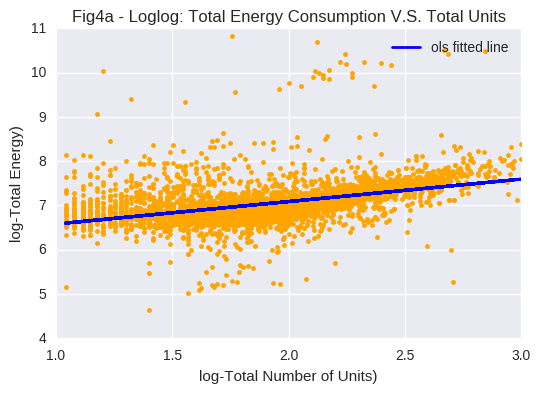

In [40]:
# plot observation points
pl.plot(bblnrgdata_cut_lg['log_UnitsTotal'], bblnrgdata_cut_lg['log_total_energy'], '.', c='orange', label='') 
pl.ylim(4,11) 
pl.xlim(1,3)

# plot prediction line
pl.plot(bblnrgdata_cut_lg['log_UnitsTotal'], bblnrgdata_cut_lg['Y_pred_log_nrg'], c='b', linewidth=2,label="ols fitted line")

pl.title('Fig4a - Loglog: Total Energy Consumption V.S. Total Units')                                 
pl.xlabel("log-Total Number of Units)")
pl.ylabel("log-Total Energy)")
pl.legend()

lm_lgEU.summary()

### Fit a linear model for Units vs Energy

In [41]:
# Fit a linear model for units vs energy
lm_lgUE = smf.ols( formula='log_UnitsTotal ~ log_total_energy', data=bblnrgdata_cut_lg, missing='drop').fit()
lm_lgUE.params

Intercept          -0.532708
log_total_energy    0.345534
dtype: float64

In [42]:
#suppose the linear model likes y = bx + a, I create a array [intercept, slope]
lgUE_ab = np.array([lm_lgUE.params[0], lm_lgUE.params[1]]).T
print (lgUE_ab)

X_lgNrg = sm.add_constant(bblnrgdata_cut_lg.log_total_energy)
#print (X_lgNrg)
Y_pred_log_units = np.dot(X_lgNrg, lgUE_ab)
#print (Y_pred_log_units)
bblnrgdata_cut_lg['Y_pred_log_units'] = Y_pred_log_units

bblnrgdata_cut_lg.head(3)

[-0.53270773  0.34553383]


,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),DOF Number of Buildings,AssessTot,BldgArea,BldgClass,MAPPLUTO_F,NumBldgs,NumFloors,...,YearAlter2,YearBuilt,ZMCode,ZipCode,geometry,total_energy,log_total_energy,log_UnitsTotal,Y_pred_log_nrg,Y_pred_log_units
0,1.013110e+09,125.4,330000.0,1.0,56065500.0,313200,O4,0,1,32.0,...,0,1977,Y,10022,"POLYGON ((993141.1744000018 216172.3948000073,...",41382000.0,7.616811,1.748188,6.960633,2.099158
2,1.008150e+09,117.0,364000.0,1.0,36930600.0,364000,O4,0,1,22.0,...,0,1954,None,10018,"POLYGON ((988118.5699999928 213939.7745999992,...",42588000.0,7.629287,1.380211,6.774298,2.103469
3,1.005050e+09,82.1,235370.0,1.0,24756300.0,214110,O6,0,1,10.0,...,0,1926,None,10013,"POLYGON ((982849.6037999988 203886.2427999973,...",19323877.0,7.286094,1.380211,6.774298,1.984884


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_UnitsTotal   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     841.5
Date:                Mon, 17 Oct 2016   Prob (F-statistic):          5.70e-168
Time:                        17:56:56   Log-Likelihood:                -1511.5
No. Observations:                3970   AIC:                             3027.
Df Residuals:                    3968   BIC:                             3040.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           -0.5327      0.084     -6.341      0.000        -0.697    -0.368
log_total_energy     0.3455      0.012     29.009      0.000         0.322     0.369
==============================================================================
Omnibus:                      139.633   Durbin-Watson:                   1.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.615
Skew:                          -0.462   Prob(JB):                     2.67e-34
Kurtosis:                       3.282   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

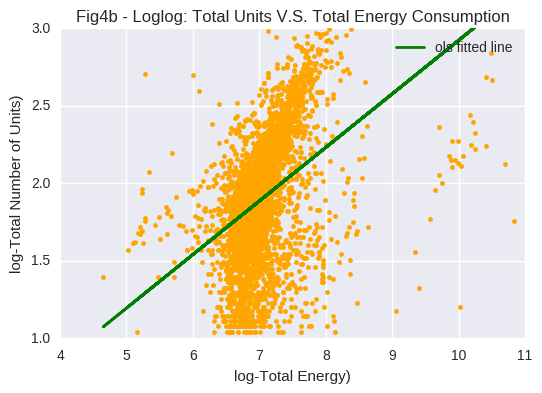

In [43]:
# plot observation points
pl.plot(bblnrgdata_cut_lg['log_total_energy'], bblnrgdata_cut_lg['log_UnitsTotal'], '.', c='orange', label='') 
pl.xlim(4,11) 
pl.ylim(1,3)

# plot prediction line
#pl.plot(bblnrgdata_cut_lg['log_total_energy'], bblnrgdata_cut_lg['Y_pred_log_units'], c='g', linewidth=2,label="ols fitted line")
pl.plot(bblnrgdata_cut_lg['log_total_energy'], lm_lgUE.predict(), c='g', linewidth=2,label="ols fitted line")

pl.title('Fig4b - Loglog: Total Units V.S. Total Energy Consumption')                                 
pl.xlabel("log-Total Energy)")
pl.ylabel("log-Total Number of Units)")
pl.legend()

lm_lgUE.summary()

### Evaluate which models is better (using Chi-square)
*Assume poisson statistics for the errors on the independent variable*. 
   The function is 
    
   chisq = $\sum_i \frac{(model(x_i) - data(x_i))^2 }{ error_i^2}$
    
   where the sum is over all datapoints, 
    
   for the i-th value with x value $x_i$ model is the predction of your fit for $x_i$, 
    
   $data(x_i)$     is your observation, 
    
   and $error_i$ is $\sqrt{data(x_i)}$   <br/>
   
   #### so $log_{10}error_i$ =  1/2* $log_{10}data(x_i)$

In [45]:
#Calculate the errors for log
#energy the estimiates
errEU = 1/2 * bblnrgdata_cut_lg['log_total_energy']
chisqEU = ((Y_pred_log_nrg - bblnrgdata_cut_lg['log_total_energy'])**2 / errEU**2).sum()

chisqEU

52.160908482311605

In [46]:
#unit is the estimates
errUE = 1/2 * bblnrgdata_cut_lg['log_UnitsTotal']
chisqUE = ((Y_pred_log_units - bblnrgdata_cut_lg['log_UnitsTotal'])**2 / errUE**2).sum()

chisqUE

828.21922606230214

#### I pick the model that has smaller chisquare -- So total units is the Independent Variable and total energy consumption is the Dependant Variable.

### **Fit a 2nd degree polynomial** to the Units vs Energy (with statsmodels.formulae.api.ols() for example passing the formula for a parabola, like we did in class. The formula for a 2nd deg polynomial is $y = ax^2+bx+c$ .

In [47]:
bblnrgdata_cut_lg['log_UT2'] = bblnrgdata_cut_lg['log_UnitsTotal']**2
# for same results, we can also perform: bblnrgdata_cut_lg['total_energy'].applymap(np.log10) ** 2

lm_lgEU_poly = smf.ols(formula= 'log_total_energy ~ log_UT2 + log_UnitsTotal', data=bblnrgdata_cut_lg).fit()
lm_lgEU_poly.params

Intercept         8.112677
log_UT2           0.576641
log_UnitsTotal   -1.707635
dtype: float64

In [48]:
Y_pred_log_nrg_poly =  (lm_lgEU_poly.params[1])*(bblnrgdata_cut_lg['log_UT2']) \
                    + (lm_lgEU_poly.params[2])*(bblnrgdata_cut_lg['log_UnitsTotal']) + lm_lgEU_poly.params[0]
bblnrgdata_cut_lg['Y_pred_log_nrg_poly'] = Y_pred_log_nrg_poly

In [49]:
bblnrgdata_cut_lg.head(5)

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),DOF Number of Buildings,AssessTot,BldgArea,BldgClass,MAPPLUTO_F,NumBldgs,NumFloors,...,ZMCode,ZipCode,geometry,total_energy,log_total_energy,log_UnitsTotal,Y_pred_log_nrg,Y_pred_log_units,log_UT2,Y_pred_log_nrg_poly
0,1.013110e+09,125.4,330000.0,1.0,56065500.0,313200,O4,0,1,32.0,...,Y,10022,"POLYGON ((993141.1744000018 216172.3948000073,...",41382000.0,7.616811,1.748188,6.960633,2.099158,3.056161,6.889719
2,1.008150e+09,117.0,364000.0,1.0,36930600.0,364000,O4,0,1,22.0,...,None,10018,"POLYGON ((988118.5699999928 213939.7745999992,...",42588000.0,7.629287,1.380211,6.774298,2.103469,1.904983,6.854272
3,1.005050e+09,82.1,235370.0,1.0,24756300.0,214110,O6,0,1,10.0,...,None,10013,"POLYGON ((982849.6037999988 203886.2427999973,...",19323877.0,7.286094,1.380211,6.774298,1.984884,1.904983,6.854272
4,1.021420e+09,137.7,64806.0,1.0,2696400.0,64816,D7,0,1,6.0,...,None,10032,"POLYGON ((1001098.760600001 246912.0266000032,...",8923786.2,6.950549,1.792392,6.983017,1.868942,3.212668,6.904483
5,1.021750e+09,103.2,62839.0,1.0,2628450.0,62847,D7,0,1,6.0,...,None,10040,"POLYGON ((1004289.818200007 253753.9873999953,...",6484984.8,6.811909,1.929419,7.052404,1.821037,3.722657,6.964572


In [93]:
c = lm_lgEU_poly.params[0]
b = lm_lgEU_poly.params[2]
a = lm_lgEU_poly.params[1]  #poly

x_fit = np.linspace(1,3,100)
y_fit = a*xxx**2  + b*xxx + c

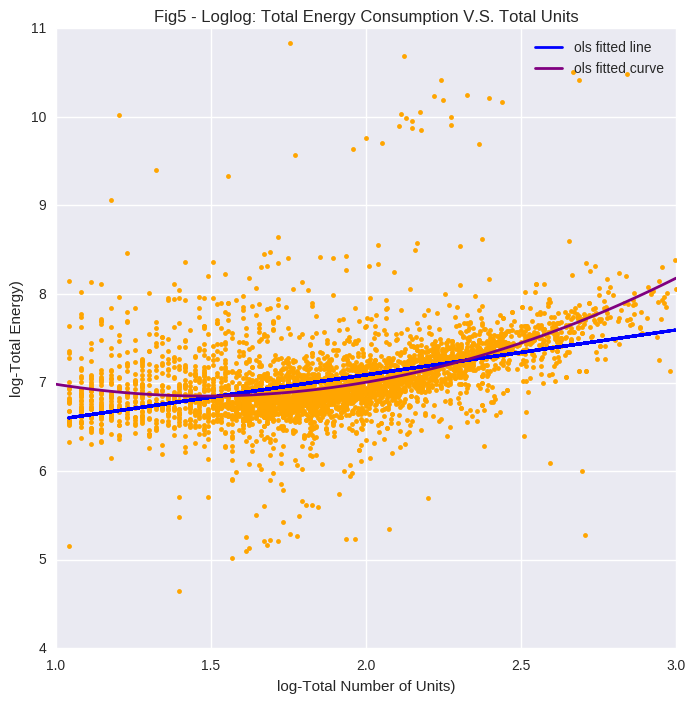

In [95]:
fig = pl.figure(figsize=(8,8))

# plot observation points
pl.plot(bblnrgdata_cut_lg['log_UnitsTotal'], bblnrgdata_cut_lg['log_total_energy'], '.', c='orange', label='') 

# plot prediction line
pl.plot(bblnrgdata_cut_lg['log_UnitsTotal'], bblnrgdata_cut_lg['Y_pred_log_nrg'], c='b', linewidth=2,label="ols fitted line")

# plot prediction curve
pl.plot(x_fit, y_fit, c='purple', linewidth=2,label="ols fitted curve")

# not sure why 
# #xxx = bblnrgdata_cut_lg['log_UnitsTotal']
#yyy = bblnrgdata_cut_lg['Y_pred_log_nrg_poly']bblnrgdata_cut_lg['Y_pred_log_nrg_poly']

pl.ylim(4,11) 
pl.xlim(1,3)

pl.title('Fig5 - Loglog: Total Energy Consumption V.S. Total Units')                                 
pl.xlabel("log-Total Number of Units)")
pl.ylabel("log-Total Energy)")
pl.legend()

## Extra credit 1: calculate and plot the likelihood surface
Create a function that minimizes the residuals:

the residuals are the sum of the differences between data and model: in the case of a line fit model. Use the same function you created for the chi^2 test.

You should sum over each datapoints the residuals squared, which should look something like

(np.log(bblnrgdatacut.nrg) - np.log(bblnrgdatacut.UnitsTotal)*a+b )^2 / errors^2

where a and b are the parameters returned by the line fitter. 

For each data point you can calculate the model at different values : for example in a range B = np.arange (-100, 100, 1) for the intercept, and A = np.arange(-50.0, 50.0, 0.5) for the slope.


You can write it as a nested for loop (or challenge yourself and vectorize it!) with a loop inside another ranging all poissible combinations of the 2 variables (i use enumerate to get both an index from 0 to the size of my array, which i assign to i (and j) and the value of the array at that index - look up the syntax!):


Lsurface = np.zeros((len(A), len(B)))
for i,a in enumerate(A):
    for j,b in enumerate(B):
         Lsurface[i][j] = np.nansum(residuals(a,b,data,errors)) .....

this gives you a 2D array that represents your likelihood surface! What we do to find a good fit is find the minimum (lowest point) on this surface.
You can plot a surface (a 2D array) with pl.imshow(Lsurface) as a "heatmap" but when you do that you will find that the plot is very uninformative. just like you did before with the data, plot the log of it (pl.imshow(np.log(Lsurface)). Also make sure your x and y axes tick numbers represent the range of values, not the cell index, which is the default for imshow. Inputting your data in the cell below should give a plot similar to mine

In [135]:
print ("LR : ", -2 * (-lm_lgEU.llf - (-lm_lgEU_poly.llf)))
print ("LR from statsmodels:", lm_lgEU_poly.compare_lr_test(lm_lgEU))

LR :  -302.285439493
LR from statsmodels: (302.28543949311188, 1.0467844696062843e-67, 1.0)


In [338]:
lm_lgEU.params

Intercept         6.075391
log_UnitsTotal    0.506377
dtype: float64

In [98]:
error = 1/2 * bblnrgdata_cut_lg['log_total_energy']

In [119]:
ns, ni = 150,150
slope = np.linspace(-10, 10, ns)
intercpt = np.linspace(1, 16, ni)

s_vec, i_vec = np.meshgrid(slope, intercpt)

Lsurface = np.zeros((len(slope), len(intercpt)))   #using loop
Lsurface2 = np.zeros((len(slope), len(intercpt)))  #using np.vectorize
print (s_vec, i_vec)

[[-10.          -9.86577181  -9.73154362 ...,   9.73154362   9.86577181
   10.        ]
 [-10.          -9.86577181  -9.73154362 ...,   9.73154362   9.86577181
   10.        ]
 [-10.          -9.86577181  -9.73154362 ...,   9.73154362   9.86577181
   10.        ]
 ..., 
 [-10.          -9.86577181  -9.73154362 ...,   9.73154362   9.86577181
   10.        ]
 [-10.          -9.86577181  -9.73154362 ...,   9.73154362   9.86577181
   10.        ]
 [-10.          -9.86577181  -9.73154362 ...,   9.73154362   9.86577181
   10.        ]] [[  1.           1.           1.         ...,   1.           1.           1.        ]
 [  1.10067114   1.10067114   1.10067114 ...,   1.10067114   1.10067114
    1.10067114]
 [  1.20134228   1.20134228   1.20134228 ...,   1.20134228   1.20134228
    1.20134228]
 ..., 
 [ 15.79865772  15.79865772  15.79865772 ...,  15.79865772  15.79865772
   15.79865772]
 [ 15.89932886  15.89932886  15.89932886 ...,  15.89932886  15.89932886
   15.89932886]
 [ 16.          16.

In [ ]:
# Using Loops
# def CalcResidual(X, Y, slope, intercept):
#    return sum(((Y - (X * slope + intercept))**2)/error**2)


# for each slope, loop all the intercepts and calculate the residue for this specific (s,i) combination
#for s in xrange(ns):  #same as Lsurface.shape[0] = 150
#    for i in xrange(ni):
#        Lsurface[s][i] = CalcResidual(bblnrgdata_cut_lg.log_UnitsTotal, bblnrgdata_cut_lg.log_total_energy,\
#        s_vec[s][i],i_vec[s][i])

In [121]:
# Using np.ectorize

IV = bblnrgdata_cut_lg.log_UnitsTotal
DV = bblnrgdata_cut_lg.log_total_energy

def CalcResidual2(slope, intercept):
    return sum(((DV - (IV * slope + intercept))**2)/error**2)

Lsurface2 = np.vectorize(CalcResidual2)(s_vec, i_vec).reshape(len(s_vec), len(i_vec))

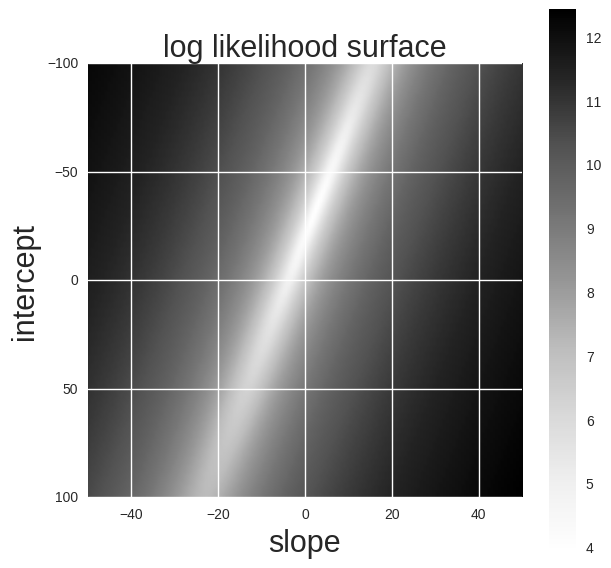

In [122]:
# Plot for Lsurface2 (the same as Lsurface)

pl.figure(figsize=(7,7))
pl.title ("log likelihood surface", fontsize = 22)
pl.imshow(np.log(Lsurface2), extent = [-50,50,100,-100], aspect=0.5)
pl.xlabel('slope', fontsize = 22)
pl.ylabel('intercept', fontsize = 22)
pl.colorbar()

## EXTRA CREDIT: get creative with the dataset. can you make an insigntful plot to show any structure in the data?

below I am mapping the building age to a colormap and the ratio of total to residential units to the size of the datapoint.

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


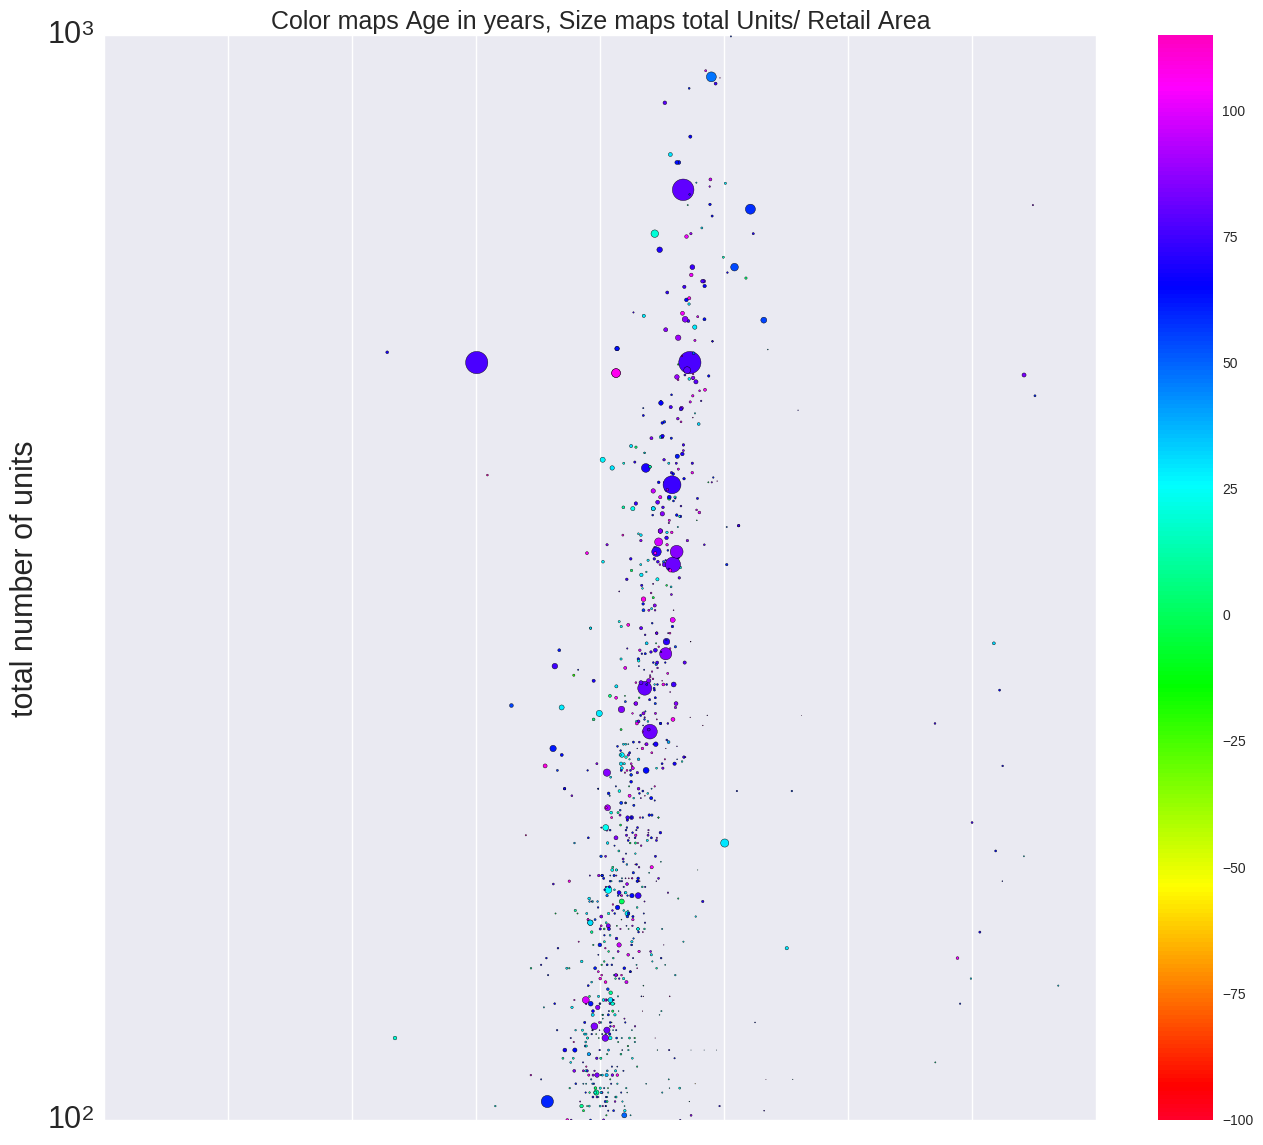

In [134]:
bblnrgdata_cut['YearBuilt'][bblnrgdata_cut['YearBuilt']<1800]=1800

pl.figure(figsize=(8,8))
bblnrgdata_cut.plot(kind='scatter',x='total_energy',y='UnitsTotal', 
                fontsize=22, colormap='gist_rainbow', alpha = 1, 
                marker='o',  figsize=(16, 14), loglog=True,  
                xlim=(1000,1e11), ylim=(1,1000), 
                c=bblnrgdata_cut['YearBuilt']-1900, 
                s=bblnrgdata_cut['UnitsTotal']/bblnrgdata_cut['RetailArea']*100)

pl.ylim(1e2, 1e3)

pl.title('Color maps Age in years, Size maps total Units/ Retail Area', fontsize=18)
pl.ylabel("total number of units", fontsize=22)
pl.xlabel("total energy consumption (kBtu)", fontsize=22)